In [1]:
# do all the import stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from scipy import signal
import numpy as np
import math

In [2]:
def normalize(A, maxA):
    time = A[maxA,1]
    S = np.zeros_like(A)
    S[:,1] = time
    A -= S
    return A[maxA:,]

def extract_massif(filename):
    f = open(filename, 'r')
    values = []
    c = -1
    c_time = -1
    c_heap = -1
    max_pos = -1
    max_value = -1
    c_extra = -1
    for line in f:
        if line.startswith("snapshot="):
            c = int(line.replace('snapshot=', ''))
        elif line.startswith("time="):
            c_time = int(line.replace('time=', ''))
        elif line.startswith("mem_heap_B="):
            c_heap = int(line.replace('mem_heap_B=', ''))
        elif line.startswith('mem_heap_extra_B='):
            c_extra = int(line.replace('mem_heap_extra_B=', ''))
            values.append([c, c_time, c_heap, c_extra])
            if (c_heap + c_extra) > max_value:
                max_value = c_heap + c_extra
                max_pos = c
    return normalize(np.array(values), max_pos)

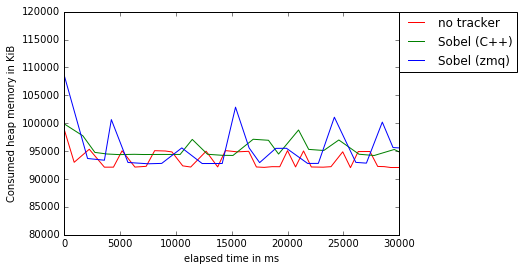

In [23]:
V = extract_massif('massif.out.racecar_sobel')

x = V[:,1]
y1 = V[:,2]/1024

Vpy = extract_massif('massif.out.racecar_sobel_py')
x_py = Vpy[:,1]
y1_py = Vpy[:,2]/1024

Vc = extract_massif('massif.out.racecar_sobel_cpp')
x_c = Vc[:,1]
y1_c = Vc[:,2]/1024

#fig = plt.figure(figsize=(16, 8))
f, ax = plt.subplots(1,1, figsize=(6, 4), sharex=True, sharey=False)
norm = ax.plot(x,y1, 'r', label="no tracker")
cpp = ax.plot(x_c,y1_c, 'g', label='Sobel (C++)')
pyth = ax.plot(x_py,y1_py, 'b', label="Sobel (zmq)")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 30000)
plt.ylabel('Consumed heap memory in KiB')
plt.xlabel('elapsed time in ms')
plt.ylim(80000, 120000)
plt.show()

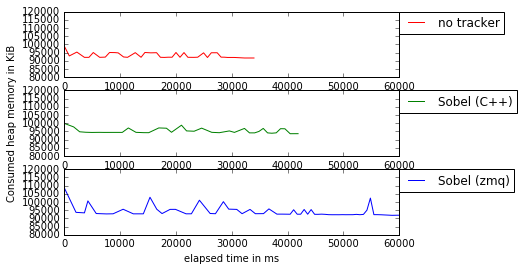

In [39]:
#f, ax = plt.subplots(3,1, figsize=(8, 5))

RIGHT = 60000

a3 = plt.subplot(313)
a = a3.plot(x_py,y1_py, 'b', label="Sobel (zmq)")
a3.set_ylim([80000, 120000])
a3.set_xlim([0, RIGHT])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('elapsed time in ms')

a1 = plt.subplot(311, sharex=a3, sharey=a3)
b = a1.plot(x,y1, 'r', label="no tracker")
a1.set_ylim([80000, 120000])
a1.set_xlim([0, RIGHT])

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

a2 = plt.subplot(312, sharex=a3, sharey=a3)
c = a2.plot(x_c,y1_c, 'g', label='Sobel (C++)')
a2.set_ylim([80000, 120000])
a2.set_xlim([0, RIGHT])

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.ylabel('Consumed heap memory in KiB')

plt.show()